# Control

## Setting up Colab

In [ ]:
colab_nb = 'google.colab' in str(get_ipython())

In [ ]:
if colab_nb:
  from google.colab import drive
  drive.mount('/content/drive')

In [ ]:
if colab_nb:
  %cd /content/drive/My Drive/aad/code/tests/control

In [ ]:
if colab_nb:
  !pip install pyclothoids

## Exercise
Please go to `code/exercises/control/pure_pursuit.py` and work on the "TODO" items!
This notebook will run your pure pursuit and PID implementation in a simple simulation. If your implementation works fine for this simple simulation, you have successfully finished the exercise :). Optionally, you can also test your implementation in Carla. For details regarding the Carla simulation, check the book.

First you can set `run_student_code = False` and see the sample solution at work. After that set `run_student_code = True` and see your implementation at work.

In [1]:
run_student_code = False

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../../')
if run_student_code:
    from exercises.control import pure_pursuit
else:
    from solutions.control import pure_pursuit

In [4]:
import numpy as np 
from vehicle import Vehicle
from track import Track
from simulation import Simulation, show_img

The next cell lets you choose a visualization option. The remaining cells run the simulation. If you choose a new visualization option, you need to rerun those cells. Explanation of the visualization options:
* **None** No visualization, but you will see how much the vehicle deviated from the lane center with `sim.plot_error()`. Hence, this is good enough to test and tune your controller
* **offline** A gif with a visualization will be created. The simulation cell will take longer to execute.
* **online** You see the visualization while the simulation is executed. You will get problems with the visualization if you have print statements in your `pure_pursuit.py`

In [5]:
from ipywidgets import RadioButtons
print("Choose visualization option")
viz = RadioButtons(options=['None', 'offline', 'online'],
                   value = 'None', # default value   
                   description='', disabled=False)
display(viz)

Choose visualization option


RadioButtons(options=('None', 'offline', 'online'), value='None')

Note that there is a "TODO" item in the following cell. You need to tune the parameters of the PID controller here. 

In [14]:
# set up simulation
wheel_base = 2.65
# TODO: Tune your PID here
Kp, Ki, Kd = 3,0,0
pp = pure_pursuit.PurePursuit(wheel_base=wheel_base, waypoint_shift=0)
pid = pure_pursuit.PIDController(Kp, Ki, Kd, 0)
controller = pure_pursuit.PurePursuitPlusPID(pure_pursuit=pp, pid=pid)
vehicle = Vehicle(wheel_base=wheel_base)
sim = Simulation(vehicle, Track(), controller)

In [15]:
# run simulation
from IPython.display import clear_output
img_list = []
for i in range(1,1000):
    try:
        sim.step()
        # visualization
        if viz.value!="None":
          img = sim.cv_plot()
          if i%2==0:
            img_list.append(img)
            if viz.value=="online":
              show_img(img)
          if viz.value=="online":
            clear_output(wait=True)
        # check for simulation end
        if len(sim.waypoints) < 10:
            break

    except KeyboardInterrupt:
        break
   

The distance from the vehicle's reference point to the lane center line is called the cross track error. It should be as close to zero as possible. Let's see how it evolved in the simulation:
从车辆基准点到车道中心线的距离称为横向轨道误差。它应该尽可能接近零。让我们看看它在模拟中是如何演变的：

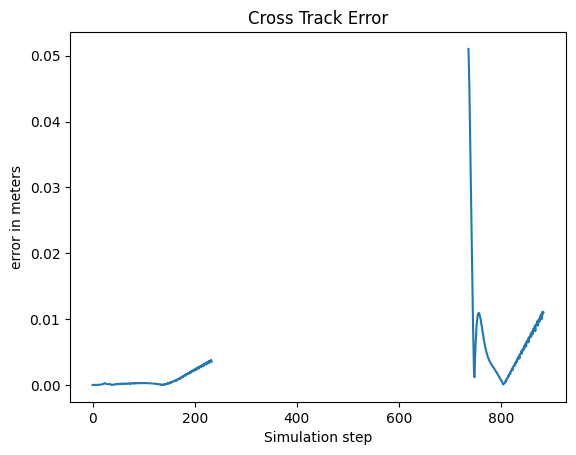

In [16]:
sim.plot_error()

Next, let us have a look at the velocity over time. The desired velocity is marked with a dashed line.

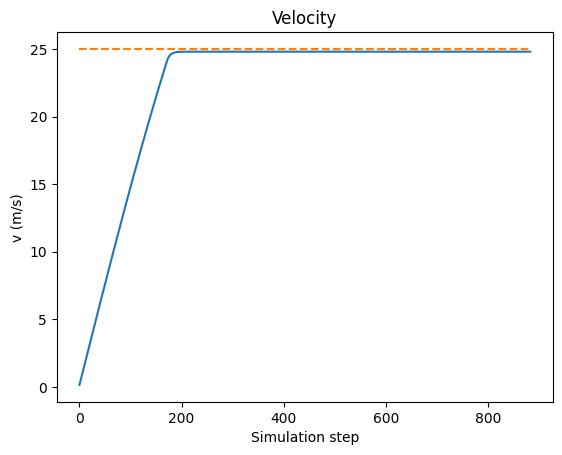

In [9]:
sim.plot_velocity()

The simulation video will be stored as a gif, and this gif will be displayed here. If visualization was set to "None", you will just see a black square.

In [10]:
import imageio
if viz.value=="None":
  img_list = [np.uint8(np.zeros((100,100,3)))]
imageio.mimsave('control.gif', img_list, fps=20)

ModuleNotFoundError: No module named 'imageio'

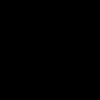

In [11]:
from IPython.display import Image
Image(open('control.gif','rb').read())